# Week 06 Lecture: Molecular Dynamics Concepts 1

- Hamiltonian mechanics 
- kinetic and potential energy
- integrating equations of motion 
- reversibility 
- randomness

## 21st century computing using 18th century physics

| <img src="https://cdn.pixabay.com/photo/2019/01/16/20/26/isaac-newton-3936704_1280.png" width="300"></img> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Euler_1778.jpg/1014px-Euler_1778.jpg?20181213194654" width="300"></img> | <img src="https://upload.wikimedia.org/wikipedia/commons/4/46/%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6.jpg" width="300"></img> | <img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/William_Rowan_Hamilton_portrait_oval_combined.png" width="300"></img> |
|:---:|:---:|:---:|:---:|
| Isaac Newton (1643-1727) | Leonard Euler (1707-1783) | Joseph-Louis Lagrange (1736-1813) | William Rowan Hamilton (1805-1865) |

The molecular dynamics technique is built on a branch of Classical Mechanics called "Hamiltonian Mechanics".  For our purposes we will only need some basic calculus.  Today we'll review the necessary concepts.

For additional materials here, check out:  

- [Wikipedia: Hamiltonian Mechanics](https://en.wikipedia.org/wiki/Hamiltonian_mechanics)  

## The problem

Imagine we have a collection of objects, where their **positions** are denoted with ($\overrightarrow{x}$) and their **velocities** are denoted with ($\overrightarrow{v}$).  Each of these are vectors, where the number of elements is equal to the number of particles times the number of spatial dimensions.  Let's say we are working in 3-D space, with $N$ objects, so $\overrightarrow{x}$ and $\overrightarrow{v}$ will have size $3N$.  

We can denote the **mass** of the objects by $\overrightarrow{m}$, which is a vector of size $N$.

*Note on notation:  This notebook is using (x,v) notation, but you might also come across resources using (q,p) to denote the positions and momenta, respectively. We will try and keep (x,v) notation consistent throughout these course materials.*

**The goal:** If we know the initial conditions of the $\overrightarrow{x}$ and $\overrightarrow{v}$ vectors at some initial time $t_0$, how do we calculate the values of $\overrightarrow{x}$ and $\overrightarrow{v}$ in the future?

## The Hamiltonian

Obviously to accomplish this goal we are going to need information about how what these particles are and how they interact with each other. This can be accomplished using a single function called the **Hamiltonian**:

\begin{equation}
\mathscr{H}(x,v) = U(x) + T(v)
\end{equation}

where $U(x)$ is the potential energy function (also called the "internal energy" function) that depends only on the particle positions and $T(v)$ is the kinetic energy function that depends only on the velocities.  

While the particular form of $U(x)$ can be complicated, and is different from system-to-system, the kinetic energy function is simply defined as:

\begin{equation}
T(v) = \frac{1}{2}\sum_i m_i |v_i|^2
\end{equation}

where $\sum_i$ is a sum over all of the particles in the system.

## Using the Hamiltonian to evolve the system 

The evolution of the system is then described completely by **Hamilton's equations**.
A simplified version of these is given below.

\begin{align}
\frac{dx}{dt} &= \frac{1}{m}\frac{d\mathscr{H}}{dv} = v \\
\frac{dv}{dt} &= -\frac{1}{m}\frac{d\mathscr{H}}{dx} = -\frac{1}{m}\frac{dU}{dx}
\end{align}

where the $1/m$ factors are necessary since we were dealing with the velocity instead of the momentum.

The top equation above is intuitive: **the rate of change of the positions is given by the velocity.**  The second equation is less intuitive and requires some more explanation.

## Net forces

Another way to describe the second equation above, for a given particle, is as follows:

\begin{equation}
\overrightarrow{F}_{\text{net}} = m\overrightarrow{a} = m\frac{d\overrightarrow{v}}{dt} = -\frac{dU}{d\overrightarrow{x}}
\end{equation}

where we have brought back the arrows to remind us which variables are vectors.  If this equation is for a single particle, all vectors would have three components corresponding to the three spatial dimensions.  

The net force on each atom, by Newton's second law, is equal to its acceleration times its mass.  The acceleration is equal to the time derivative of the velocity, which as we have seen is equal to the negative derivative of the internal energy function $U$ with respect to the positions, $\overrightarrow{x}$.  **Why is this?**

## Gaining intuition about dU/dx

Consider the potential energy surface $U(x) = kx^2$, where $\frac{dU}{dx} = 2kx$:
<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem1-01.png?raw=true" width="500"/>

If we think about a marble rolling in a smooth bowl, it is intuitive that a particle resting at positive $x$ will experience a force in the left-ward direction.  Connecting this to our equation above, we see this is indeed the case.  The derivative of $U$ with respect to $x$ is positive for $x > 0$, so the net force on that particle will be in the negative direction.  Since the derivative is equal to $2kx$, we see that the higher we go, the larger this net force will be. 

<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem2-01.png?raw=true" width="500"/>

The same particle sometime later will have travelled leftward and gained some velocity in the negative direction.  As the $dU/dx$ is still positive, it continues to accelerate in the negative direction.

<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem3-01.png?raw=true" width="500"/>

As our particle reaches $x=0$ is has accumulated its maximum velocity in the leftward direction.  Here $dU/dx = 0$, so it is experiencing no net force, however it continues to move rapidly.

<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem4-01.png?raw=true" width="500"/>

As $x$ goes negative our particle begins to decelerate. Here $dU/dx$ is negative, so our net force is in the positive direction and our particle is gradually losing its negative velocity.

<img src="https://github.com/ADicksonLab/ml4md-jb/blob/main/figures/Ham_schem5-01.png?raw=true" width="500"/>

Eventually our particle loses momentum, the velocity reaches zero, and the particle is once again stationary with a maximum value of potential energy. 

## Integrators:  Numerically solving Hamilton's equations

Now that we have equations for $dx/dt$ and $dv/dt$, how do we solve them for $x$ and $v$?  **In other words, how do we actually generate our trajectories?**

This type of problem is called an **initial value problem** or IVP.  For simple systems (like the single particle above), one can find exact solutions.  However, for systems we are interested in these IVPs can be solved numerically.

A simple illustrative approach is to use **Euler's method**.  Starting with the definition of $v = \frac{dx}{dt} \approx \frac{x(t+\delta t) - x(t)}{\delta t}$, we can rearrange to get:
\begin{equation}
x(t + \delta t) \approx x(t) + v\delta t
\end{equation}
where the approximation becomes exact as $\delta t \rightarrow 0$.


Similarly, from $a = \frac{dv}{dt} \approx \frac{v(t+\delta t) - v(t)}{\delta t}$ we can get:
\begin{equation}
v(t + \delta t) \approx v(t) - \frac{1}{m}\frac{dU}{dx(t)} \delta t
\end{equation}

## An example:

A single particle in a harmonic well:  $U(x) = \frac{1}{2} k x^2$ .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 1      # initial value of x
v0 = 0      # initial velocity
k = 100     # "spring" constant for potential energy
m = 1       # mass of particle
dt = 0.01    # time step
N = 1000     # number of time steps

In [2]:
def force(x):
    """Compute the force for a simple 1D, one particle system."""
    return -k*x

In [3]:
def total_energy(m,k,x,v):
    return 0.5*m*v**2 + 0.5*k*x**2

Then let's make a trajectory that is 1000 steps long:

In [4]:
traj_x = np.zeros(N)
traj_v = np.zeros(N)
traj_e = np.zeros(N)

x = x0
v = v0

for step in range(N):
    # use them in update equations
    x = x + v*dt
    v = v + force(x)*dt/m
    
    # append values to trajectories
    traj_x[step] = x
    traj_v[step] = v
    traj_e[step] = total_energy(m,k,x,v)

Text(0, 0.5, 'Total Energy')

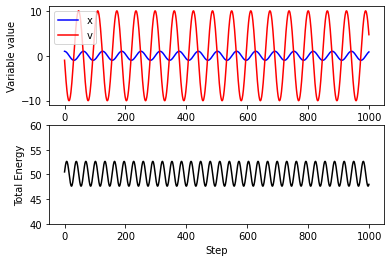

In [5]:
plt.subplot(2,1,1)
plt.plot(traj_x,color="blue",label='x')
plt.plot(traj_v,color="red",label='v')
plt.xlabel("Step")
plt.ylabel("Variable value")
plt.legend()

plt.subplot(2,1,2)
plt.plot(traj_e,color="black")
plt.ylim(40,60)
plt.xlabel("Step")
plt.ylabel("Total Energy")

**Note: the fluctuations in total energy are due to integration errors!**

## A better integration function

Euler's method is a "first order" method: the global error (error at a given time) is proportional to the step size.  **A commonly used integration function is called the "Velocity Verlet" algorithm**, which is accurate to second order, meaning that error is proportional to the step size squared.

VV is a good choice of integrator as it is simple to implement, and has some beneficial stability properties compared to other higher-order integrators.

**The VV algorithm is as follows:**

Update $v$ (half-way):
$$v(t + \delta t/2) = v(t) + \frac{1}{2m}\left[f(t)\right]\delta t$$

Use the half-updated $v$ to (fully) update $x$:
$$x(t + \delta t) = x(t) + v(t + \delta t/2)\delta t$$

Use the updated $x$ to compute new forces, apply those to fully update $v$:
$$v(t + \delta t) = v(t + \delta t/2) + \frac{1}{2m}\left[f(t + \delta t)\right]\delta t$$


This can be done in two steps as:

$$x(t + \delta t) = x(t) + v(t)\delta t + \frac{1}{2m}f(t)\delta t^2$$
$$v(t + \delta t) = v(t) + \frac{1}{2m}\left[f(t) + f(t + \delta t)\right]\delta t$$

Text(0, 0.5, 'Total Energy')

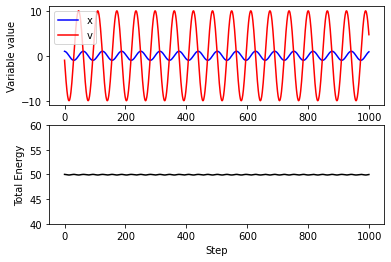

In [6]:
traj_x = np.zeros(N)
traj_v = np.zeros(N)
traj_e = np.zeros(N)

x = x0
v = v0

for step in range(N):
    # Velocity Verlet
    v_tmp = v + 0.5*force(x)*dt/m
    x = x + v_tmp*dt
    v = v_tmp + 0.5*force(x)*dt/m
    
    # append values to trajectories
    traj_x[step] = x
    traj_v[step] = v
    traj_e[step] = total_energy(m,k,x,v)
    
plt.subplot(2,1,1)
plt.plot(traj_x,color="blue",label='x')
plt.plot(traj_v,color="red",label='v')
plt.xlabel("Step")
plt.ylabel("Variable value")
plt.legend()

plt.subplot(2,1,2)
plt.plot(traj_e,color="black")
plt.ylim(40,60)
plt.xlabel("Step")
plt.ylabel("Total Energy")

## On the reversibility of trajectories

**Q: Can you integrate trajectories backwards in time?**

*A: Absolutely!  In fact, let's do it right now!* 

In [7]:
traj_x_rev = np.zeros(N)
traj_v_rev = np.zeros(N)

x = traj_x[-1]   # begin at the end of the last trajectory
v = -traj_v[-1]  # reverse the velocity!

# the first point of the reverse trajectory is the last point of the prior one
traj_x_rev[0] = x
traj_v_rev[0] = v

# integrating the remainder of the N-1 points
for step in range(N-1):
    v_tmp = v + 0.5*force(x)*dt/m
    x = x + v_tmp*dt
    v = v_tmp + 0.5*force(x)*dt/m
    
    # append values to trajectories
    traj_x_rev[step+1] = x
    traj_v_rev[step+1] = v

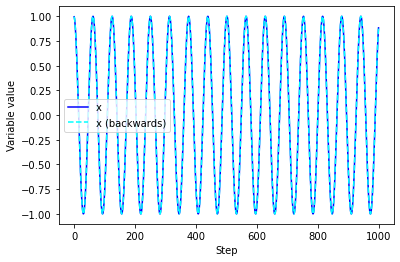

In [8]:
plt.plot(traj_x,color="blue",label='x')
plt.plot(traj_x_rev[::-1],'--',color="cyan",label='x (backwards)')

plt.xlabel("Step")
plt.ylabel("Variable value")
plt.legend()

In [9]:
# calculate distance between first and last points
print("Difference in positions:",traj_x[0]-traj_x_rev[-1])

Difference in positions: -5.218048215738236e-15


## An aside on chaos

In realistic systems with many atoms, it is extremely difficult for a trajectory to "retrace" itself after reversing the velocities.  This is because small differences between two trajectories become quickly amplified in **chaotic systems**.  You might have heard this referred to as the "butterfly effect".

Molecular systems with thousands of atoms are strongly chaotic.  In fact, much simpler systems, such as the **double pendulum** also demonstrate the same chaotic behavior.

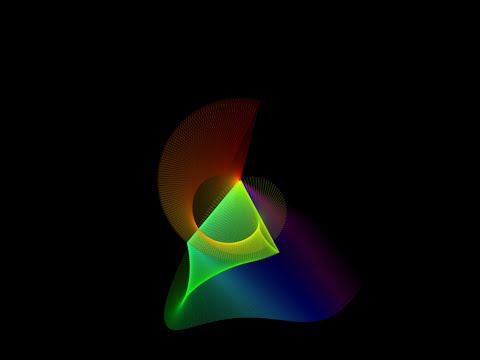

In [10]:
# Imports the functionality that we need to display YouTube videos in a Jupyter notebook.  
from IPython.display import YouTubeVideo

# Watch this video to see some double pendulums diverge!
YouTubeVideo("ldnEHycw40E",width=640,height=360)

## Introducing randomness with Langevin dynamics

Often we want to incorporate the effects of random external "noise" on a molecular system.  

A quintessential example is that of [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion), where a larger particle experiences many small "kicks" from a sea of smaller solvent particles.

**Langevin dynamics** provides a way to "tune" between completely inertial motion (no random kicks) and completely diffusive motion (velocities are instantly forgotten).  It does this by introducing two terms to the net force: **a drag term** that sucks energy out of the system, and **a random noise term** that pumps it back in as a random "kick".

An algorithm for Langevin dynamics with the Velocity Verlet algorithm is as follows:

$$x(t + \delta t) = x(t) + v(t)\delta t + \frac{1}{2m}f(t)\delta t^2$$
$$v(t + \delta t) = v(t) + \frac{1}{2m}\left[f(t) + f(t + \delta t)\right]\delta t - \gamma v(t)\delta t + \sqrt{\frac{2 \gamma k_B T}{m}} R(t) \delta t$$

where $\gamma$ is the friction coefficient, $k_B$ is [Boltzmann's constant](https://en.wikipedia.org/wiki/Boltzmann_constant) and $T$ is the temperature in Kelvin.  $R(t)$ is a random number, drawn each step from a Gaussian distribution (or "normal" distribution), with a mean of zero and a width of 1.

**Let's run some Langevin dynamics on our oscillator!**

In [11]:
x0 = 1      # initial value of x
v0 = 0      # initial velocity
k = 100     # "spring" constant for potential energy
m = 1       # mass of particle
dt = 0.01    # time step
N = 1000     # number of time steps
kT = 1000      # thermal energy
gamma = 1.0   # friction

prefac = np.sqrt(2*gamma*kT/m)

traj_x = np.zeros(N)
traj_v = np.zeros(N)
traj_e = np.zeros(N)

x = x0
v = v0

for step in range(N):
    # Velocity Verlet with noise
    f = force(x)
    x = x + v*dt + 0.5*f*dt**2/m
    v = v + 0.5*(f + force(x))*dt/m - gamma*v*dt + prefac*np.random.normal()*dt
    
    # append values to trajectories
    traj_x[step] = x
    traj_v[step] = v
    traj_e[step] = total_energy(m,k,x,v)

Text(0, 0.5, 'Total Energy')

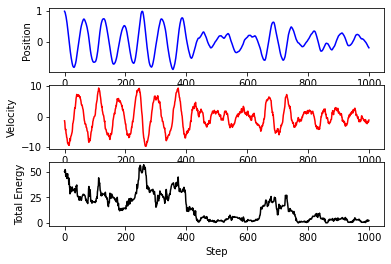

In [12]:
plt.tight_layout()
plt.subplot(3,1,1)
plt.plot(traj_x,color="blue")
plt.ylabel("Position")

plt.subplot(3,1,2)
plt.plot(traj_v,color="red")
plt.ylabel("Velocity")

plt.subplot(3,1,3)
plt.plot(traj_e,color="black")
plt.xlabel("Step")
plt.ylabel("Total Energy")

**The total energy is not conserved!**  Why is this?

## Constant temperature or constant energy, but not both

This could begin a deep dive into concepts from **statistical mechanics**, but here let's just say that you can either run with the temperature fixed and the energy fluctuating, or run with the energy fixed and the temperature fluctuating.

As you might have guessed from the $kT$ term in the noise, Langevin dynamics is a form of **thermostat**.  In other words, it is an integrator that keeps our system at a constant temperature.  We will learn more about temperature and thermostats later on.

The fact that you can't fix both $T$ and $E$ at the same time is indicative of a special relationship between the two.  They are said to be **Canonically conjugate variables**.  We will learn about other pairs of Canonically conjugate variables later as well.